# Part 1 - Model Insights

# Code

In [1]:
## Adding folder above notebookt to path (for importing from CODE)
import os, sys
# sys.path.append(os.path.abspath('../'))

## Automatically reload changed functions
%load_ext autoreload
%autoreload 2

# Custom Code used in lessons
import CODE
import CODE.lp_functions as lp

# Importing standard packages and viz styles
from CODE.standard_imports import *

# Function lp.show_code to see source code
lp.show_code(CODE.standard_imports)

```python
"""
Standard Imports module: lazy importing of essential packages

Example Use:
>> from CODE.standard_imports import *
"""
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

```

In [2]:
lp.show_code(CODE.lp_styles)
from CODE.lp_styles import *
# plt.rcParams['figure.figsize'] = (12, 8)

```python
import matplotlib.pyplot as plt
import seaborn as sns
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

```

In [3]:
# Function for Showing Source Code in Markdown with Python Syntax
lp.show_code(lp.show_code)

```python
def show_code(function):
    """Display the source code of a funciton or module.
    Uses the inspect and IPython modules to display Markdown with Python Syntax. 
    Args:
        function (function or module object): Pass the function/module to show. 
                                              Use function name, no parentheses.
        
    Example Use:
    ## Example with Function
    >> import CODE.lp_functions as lp
    >> import scipy.stats as stats
    >> lp.show_code(stats.ttest_ind)  
    """
    
    import inspect 
    from IPython.display import display,Markdown
    
    code = inspect.getsource(function)
    md_txt = f"```python\n{code}\n```"
    return display(Markdown(md_txt))

```

In [4]:
## Preprocessing Imports ([ ] TO DO: Consider making preprocess_imports module)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import (make_column_transformer, make_column_selector, 
                             ColumnTransformer)
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import metrics
from sklearn.base import clone

##import statsmodels correctly
import statsmodels.api as sm
from scipy import stats


## fixing random for lesson generation
np.random.seed(321)


In [5]:
## Load in data
FILE = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSEZQEzxja7Hmj5tr5nc52QqBvFQdCAGb52e1FRK1PDT2_TQrS6rY_TR9tjZjKaMbCy1m5217sVmI5q/pub?output=csv"


df = pd.read_csv(FILE)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# Date feature engineering 
df['datetime'] = pd.to_datetime(df['date'])

# df['Month'] =  df['datetime'].dt.month_name() 
df['Month'] = df['datetime'].dt.month
df['Year'] = df['datetime'].dt.year

df = df.set_index('id')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,datetime,Month,Year
id,,,,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014-10-13,10,2014
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014-12-09,12,2014
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015-02-25,2,2015
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014-12-09,12,2014
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015-02-18,2,2015


In [7]:
## Convert all categories to strings
CONVERT_TO_STR_COLS = ['zipcode']
df[CONVERT_TO_STR_COLS] = df[CONVERT_TO_STR_COLS].astype(str)

In [8]:
CONVERT_TO_NUM_COLS = []
for col in CONVERT_TO_NUM_COLS:
    df[col] = pd.to_numeric(df[col])

In [9]:
## Drop unwanted columns
DROP_COLS = ['date','datetime']
df_ml = df.drop(columns=DROP_COLS)
df_ml

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,5,2014
6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2,2015
1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,6,2014


In [10]:
## final info before X/y
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  object 
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64

In [11]:
df_ml.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Month            0
Year             0
dtype: int64

### Removing Outliers (from target)

<AxesSubplot: xlabel='price'>

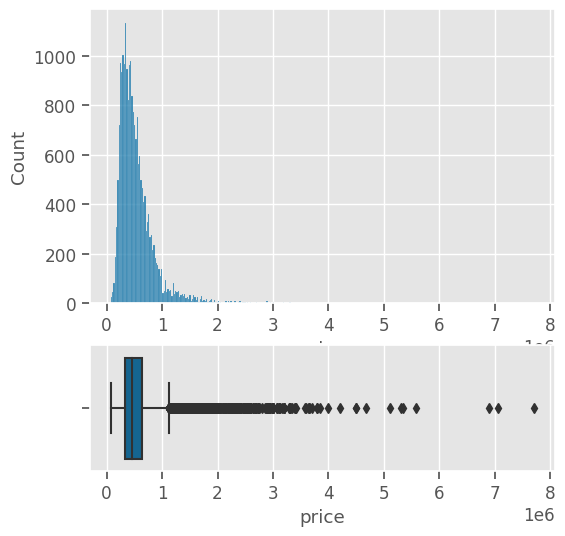

In [12]:
grid_spec = {'height_ratios':[0.7,0.3]}
fig, axes = plt.subplots(nrows=2, figsize=(6,6), gridspec_kw=grid_spec)

sns.histplot(data=df_ml, x='price',ax=axes[0])
sns.boxplot(data=df_ml, x='price',ax=axes[1])

In [13]:
import scipy.stats as stats
idx_outliers = np.abs(stats.zscore(df_ml['price']) )>3
idx_outliers.sum()

406

In [14]:
df_ml[~idx_outliers]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,5,2014
6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2,2015
1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,6,2014


In [15]:
df_ml = df_ml[~idx_outliers].copy()
df_ml

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,5,2014
6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2,2015
1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,6,2014


<AxesSubplot: xlabel='price'>

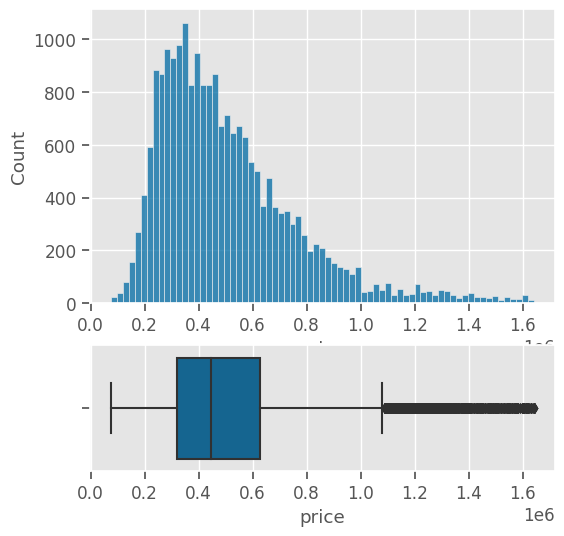

In [16]:
grid_spec = {'height_ratios':[0.7,0.3]}
fig, axes = plt.subplots(nrows=2, figsize=(6,6),gridspec_kw=grid_spec)

sns.histplot(data=df_ml, x='price',ax=axes[0])
sns.boxplot(data=df_ml, x='price',ax=axes[1])

## Preprocessing with Scikit-Learn 1.1+

In [17]:
# Run the following command on your local computer to check the version of sklearn
import sklearn
!python --version
print(f"sklearn version: {sklearn.__version__}")

Python 3.9.15
sklearn version: 1.1.3


### Preprocessing + ColumnTransformer


In [18]:
## Make x and y variables
target = 'price'
drop_cols_model = []

y = df_ml[target].copy()
X = df_ml.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
id,,,,,,,,,,,,,,,,,,,,
2895600090,3,1.00,1120,7320,1.0,0,0,4,7,1120,0,1954,0,98146,47.5103,-122.382,1410,6328,4,2015
8563000110,4,1.75,1460,9750,1.0,0,0,4,7,1460,0,1967,0,98008,47.6205,-122.102,1820,9840,4,2015
2591800340,3,2.25,1820,7420,2.0,0,0,4,8,1820,0,1983,0,98058,47.4368,-122.162,1900,7526,4,2015
7215721330,3,2.50,1650,4218,2.0,0,0,3,8,1650,0,2000,0,98075,47.5998,-122.016,1650,4559,10,2014
2424059061,4,3.50,3500,43560,2.0,0,0,3,9,2850,650,2014,0,98006,47.5481,-122.103,3640,40545,11,2014


In [19]:
## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore',
                                       sparse=False) )
cat_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [20]:
## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')
num_pipe = make_pipeline( SimpleImputer(strategy='mean'), 
#                          StandardScaler() 
                        )
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer())])

>- Note: So far, all of the code should be familiar to you. 
    -  With sklearn v1.1+, you should always add `verbose_feature_names_out=False` to column transformers *`ColumnTransformer`/ `make_column_transformer`)
        - (If you want to see what the verbose version looks like feel free to give it a try!)

In [21]:
## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x16847b640>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x1682e5f40>)],
                  verbose_feature_names_out=False)

In [22]:
## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Month', 'Year', 'zipcode_98001',
       'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98

In [23]:
### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.fit_transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,Month,Year,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2895600090,3.0,1.00,1120.0,7320.0,1.0,0.0,0.0,4.0,7.0,1120.0,0.0,1954.0,0.0,47.5103,-122.382,1410.0,6328.0,4.0,2015.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8563000110,4.0,1.75,1460.0,9750.0,1.0,0.0,0.0,4.0,7.0,1460.0,0.0,1967.0,0.0,47.6205,-122.102,1820.0,9840.0,4.0,2015.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2591800340,3.0,2.25,1820.0,7420.0,2.0,0.0,0.0,4.0,8.0,1820.0,0.0,1983.0,0.0,47.4368,-122.162,1900.0,7526.0,4.0,2015.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7215721330,3.0,2.50,1650.0,4218.0,2.0,0.0,0.0,3.0,8.0,1650.0,0.0,2000.0,0.0,47.5998,-122.016,1650.0,4559.0,10.0,2014.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2424059061,4.0,3.50,3500.0,43560.0,2.0,0.0,0.0,3.0,9.0,2850.0,650.0,2014.0,0.0,47.5481,-122.103,3640.0,40545.0,11.0,2014.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211200140,4.0,2.00,1720.0,7210.0,1.0,0.0,0.0,3.0,7.0,860.0,860.0,1971.0,0.0,47.7307,-122.239,1250.0,7210.0,7.0,2014.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6

In [24]:
## Customization Options
pd.set_option("display.max_columns",100)
X_train_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,Month,Year,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2895600090,3.0,1.00,1120.0,7320.0,1.0,0.0,0.0,4.0,7.0,1120.0,0.0,1954.0,0.0,47.5103,-122.382,1410.0,6328.0,4.0,2015.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8563000110,4.0,1.75,1460.0,9750.0,1.0,0.0,0.0,4.0,7.0,1460.0,0.0,1967.0,0.0,47.6205,-122.102,1820.0,9840.0,4.0,2015.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2591800340,3.0,2.25,1820.0,7420.0,2.0,0.0,0.0,4.0,8.0,1820.0,0.0,1983.0,0.0,47.4368,-122.162,1900.0,7526.0,4.0,2015.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7215721330,3.0,2.50,1650.0,4218.0,2.0,0.0,0.0,3.0,8.0,1650.0,0.0,2000.0,0.0,47.5998,-122.016,1650.0,4559.0,10.0,2014.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2424059061,4.0,3.50,3500.0,43560.0,2.0,0.0,0.0,3.0,9.0,2850.0,650.0,2014.0,0.0,47.5481,-122.103,3640.0,40545.0,11.0,2014.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211200140,4.0,2.00,1720.0,7210.0,1.0,0.0,0.0,3.0,7.0,860.0,860.0,1971.0,0.0,47.7307,-122.239,1250.0,7210.0,7.0,2014.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6

In [25]:
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}")


In [26]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, 
                    X_test_df, y_test)

Training Data:	R^2 = 0.84	RMSE = 104,360.48
Test Data:	R^2 = 0.84	RMSE = 104,089.46


In [27]:
reg.coef_

array([-9.14978807e+03,  1.57802438e+04,  2.09347063e+12,  2.99281651e-01,
       -1.97854995e+04,  2.36452969e+05,  4.45832141e+04,  2.63532944e+04,
        5.31832270e+04, -2.09347063e+12, -2.09347063e+12, -5.28756957e+02,
        2.23507541e+01,  1.55756986e+05, -5.28917218e+04,  3.49686308e+01,
       -6.62025479e-02,  1.06928398e+03,  3.10520879e+04, -9.53768004e+07,
       -9.53604711e+07, -9.53944111e+07, -9.48075304e+07, -9.51069338e+07,
       -9.51334611e+07, -9.51632643e+07, -9.51801122e+07, -9.52842377e+07,
       -9.53116553e+07, -9.53097881e+07, -9.53304779e+07, -9.53603647e+07,
       -9.54104799e+07, -9.52496536e+07, -9.52143780e+07, -9.53167462e+07,
       -9.51857690e+07, -9.53793973e+07, -9.53801051e+07, -9.53907262e+07,
       -9.50797462e+07, -9.52457899e+07, -9.53396584e+07, -9.46638636e+07,
       -9.49456615e+07, -9.53732813e+07, -9.52703713e+07, -9.51794555e+07,
       -9.51957577e+07, -9.53548484e+07, -9.53060665e+07, -9.53625701e+07,
       -9.53000830e+07, -

In [28]:
reg.intercept_

19555726.88676462

In [29]:
## Saving the coefficients
coeffs = pd.Series(reg.coef_, index= feature_names)
coeffs

bedrooms        -9.149788e+03
bathrooms        1.578024e+04
sqft_living      2.093471e+12
sqft_lot         2.992817e-01
floors          -1.978550e+04
                     ...     
zipcode_98177   -9.522520e+07
zipcode_98178   -9.535821e+07
zipcode_98188   -9.536367e+07
zipcode_98198   -9.537479e+07
zipcode_98199   -9.506500e+07
Length: 89, dtype: float64

In [30]:
## formatting numbers to not use , thousands sep, and 4 digits floats
pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 100)

In [31]:
coeffs

bedrooms                    -9,149.7881
bathrooms                   15,780.2438
sqft_living      2,093,470,626,970.7734
sqft_lot                         0.2993
floors                     -19,785.4995
waterfront                 236,452.9692
view                        44,583.2141
condition                   26,353.2944
grade                       53,183.2270
sqft_above      -2,093,470,626,841.1238
sqft_basement   -2,093,470,626,889.9617
yr_built                      -528.7570
yr_renovated                    22.3508
lat                        155,756.9855
long                       -52,891.7218
sqft_living15                   34.9686
sqft_lot15                      -0.0662
Month                        1,069.2840
Year                        31,052.0879
zipcode_98001          -95,376,800.4084
zipcode_98002          -95,360,471.0537
zipcode_98003          -95,394,411.0779
zipcode_98004          -94,807,530.3790
zipcode_98005          -95,106,933.8458
zipcode_98006          -95,133,461.1225


In [32]:
coeffs.sort_values()

sqft_basement   -2,093,470,626,889.9617
sqft_above      -2,093,470,626,841.1238
zipcode_98023          -95,410,479.8628
zipcode_98092          -95,400,131.1689
zipcode_98003          -95,394,411.0779
zipcode_98032          -95,390,726.2214
zipcode_98031          -95,380,105.1186
zipcode_98030          -95,379,397.2793
zipcode_98001          -95,376,800.4084
zipcode_98198          -95,374,788.4193
zipcode_98042          -95,373,281.2518
zipcode_98188          -95,363,669.9327
zipcode_98058          -95,362,570.0751
zipcode_98002          -95,360,471.0537
zipcode_98022          -95,360,364.6858
zipcode_98178          -95,358,210.1475
zipcode_98055          -95,354,848.4429
zipcode_98168          -95,344,929.8372
zipcode_98148          -95,344,070.5390
zipcode_98038          -95,339,658.4147
zipcode_98019          -95,330,477.8993
zipcode_98028          -95,316,746.2212
zipcode_98166          -95,315,597.3931
zipcode_98011          -95,311,655.3228
zipcode_98070          -95,310,481.1434


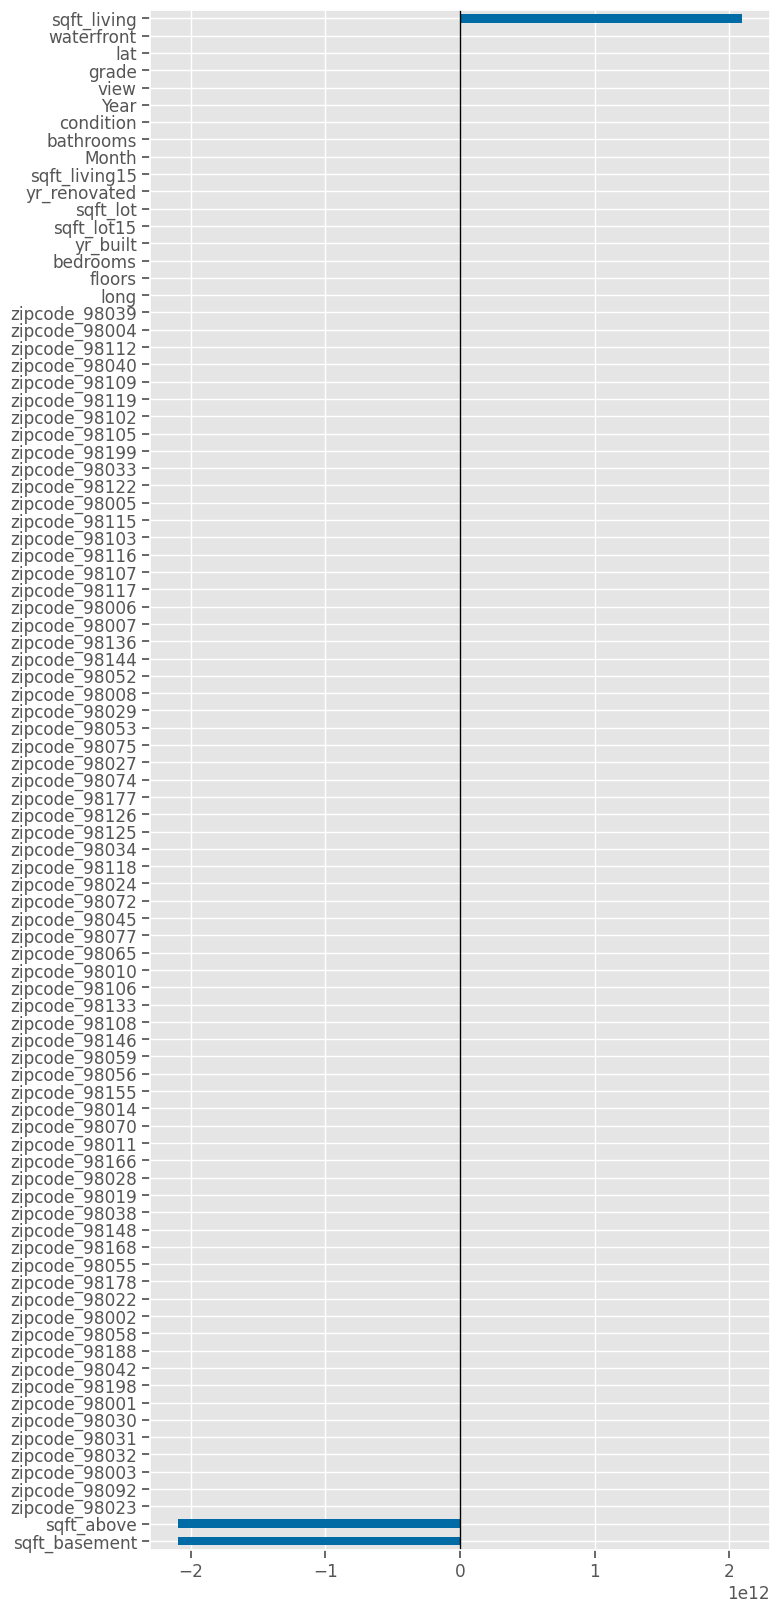

In [33]:
# with sns.plotting_context('notebook'):
ax = coeffs.sort_values().plot(kind='barh',figsize=(8,20))
ax.axvline(0,color='k', lw=1)

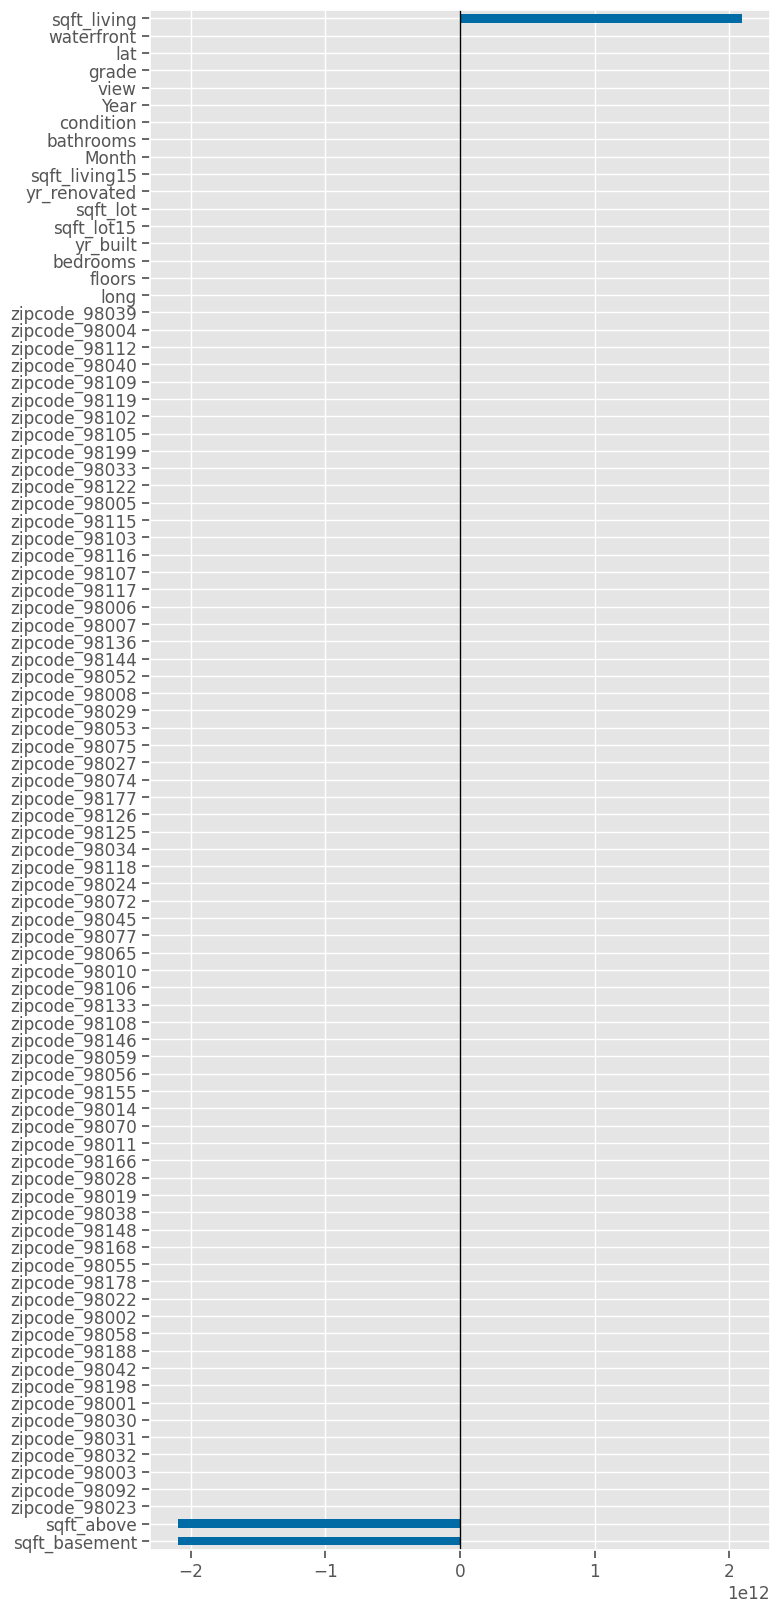

In [34]:

# with sns.plotting_context('notebook'):
ax = coeffs.sort_values().plot(kind='barh',figsize=(8,20))
ax.axvline(0,color='k', lw=1)

In [35]:
coeffs

bedrooms                    -9,149.7881
bathrooms                   15,780.2438
sqft_living      2,093,470,626,970.7734
sqft_lot                         0.2993
floors                     -19,785.4995
waterfront                 236,452.9692
view                        44,583.2141
condition                   26,353.2944
grade                       53,183.2270
sqft_above      -2,093,470,626,841.1238
sqft_basement   -2,093,470,626,889.9617
yr_built                      -528.7570
yr_renovated                    22.3508
lat                        155,756.9855
long                       -52,891.7218
sqft_living15                   34.9686
sqft_lot15                      -0.0662
Month                        1,069.2840
Year                        31,052.0879
zipcode_98001          -95,376,800.4084
zipcode_98002          -95,360,471.0537
zipcode_98003          -95,394,411.0779
zipcode_98004          -94,807,530.3790
zipcode_98005          -95,106,933.8458
zipcode_98006          -95,133,461.1225


### Multicollinearity & One Hot Encoding

In [36]:
pd.options.display.max_rows

100

In [37]:
df_ml.select_dtypes('object').nunique()

zipcode    70
dtype: int64

## UPDATE THIS
- Here is where we should consider our final use case for this data. If we want to explain student performance, there is no benefit to one-hot-encoding both categories.
- We know that if someone has a 0 for "paid_yes," that it means "paid_no" would be 1.
- To remove these unnecessary columns, we can change our arguments for our OneHotEncoder in our pipeline and add "drop='if_binary'" or "drop='first'/'last' to automatically drop one of the categories to reduce multicollinearity.
- HOWEVER, we cannot use BOTH handle_unknown AND the drop argument together. We will get an error message.
Since our current modeling will be used to extract insights for our stakeholders and will not be deployed to the cloud where it will run predictions on new data, we can safely switch to using the drop='if_binary' option.

In [38]:
## Make x and y variables
target = 'price'
drop_cols_model = ['zipcode','lat','long']

y = df_ml[target].copy()
X = df_ml.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)


## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(drop='first',
                                       sparse=False,
#                                        max_categories=15
                                      ) )


## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')

num_pipe = make_pipeline( SimpleImputer(strategy='mean'), 
#                          StandardScaler() 
                        )


## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)



## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,Month,Year
id,,,,,,,,,,,,,,,,,
2895600090,3.0000,1.0000,"1,120.0000","7,320.0000",1.0000,0.0000,0.0000,4.0000,7.0000,"1,120.0000",0.0000,"1,954.0000",0.0000,"1,410.0000","6,328.0000",4.0000,"2,015.0000"
8563000110,4.0000,1.7500,"1,460.0000","9,750.0000",1.0000,0.0000,0.0000,4.0000,7.0000,"1,460.0000",0.0000,"1,967.0000",0.0000,"1,820.0000","9,840.0000",4.0000,"2,015.0000"
2591800340,3.0000,2.2500,"1,820.0000","7,420.0000",2.0000,0.0000,0.0000,4.0000,8.0000,"1,820.0000",0.0000,"1,983.0000",0.0000,"1,900.0000","7,526.0000",4.0000,"2,015.0000"
7215721330,3.0000,2.5000,"1,650.0000","4,218.0000",2.0000,0.0000,0.0000,3.0000,8.0000,"1,650.0000",0.0000,"2,000.0000",0.0000,"1,650.0000","4,559.0000",10.0000,"2,014.0000"
2424059061,4.0000,3.5000,"3,500.0000","43,560.0000",2.0000,0.0000,0.0000,3.0000,9.0000,"2,850.0000",650.0000,"2,014.0000",0.0000,"3,640.0000","40,545.0000",11.0000,"2,014.0000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211200140,4.0000,2.0000,"1,720.0000","7,210.0000",1.0000,0.0000,0.0000,3.0000,7.0000,860.0000,860.0000,"1,971.0000",0.0000,"1,250.0000","7,210.0000",7.0000,"2,014.0000"
6381502155,3.0000,1.0000,"1,490.0000","7,200.0000",1.0000,0.0000,0.0000,3.0000,7.0000,"1,490.0000",0.0000,"1,954.0000",0.0000,"1,280.0000","7,200.0000",1.0000,"2,015.0000"
8964800695,3.0000,1.7500,"2,230.0000","13,529.0000",1.0000,0.0000,0.0000,3.0000,9.0000,"2,230.0000",0.0000,"1,949.0000",0.0000,"2,230.0000","11,900.0000",3.0000,"2,015.0000"


In [39]:
reg = LinearRegression()
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2 = 0.63	RMSE = 157,316.19
Test Data:	R^2 = 0.64	RMSE = 156,781.60


In [40]:
## Saving the coefficients
coeffs = pd.Series(reg.coef_, index= feature_names)
coeffs.loc['Intercept'] = reg.intercept_
coeffs

bedrooms            -18,183.9072
bathrooms            30,400.7667
sqft_living              58.1857
sqft_lot                  0.1336
floors               55,586.0509
waterfront          148,361.0709
view                 34,088.7550
condition            20,481.7402
grade               108,858.0159
sqft_above               10.4094
sqft_basement            47.7763
yr_built             -2,994.4156
yr_renovated             12.2145
sqft_living15            57.6895
sqft_lot15               -0.3808
Month                   478.2715
Year                 23,462.5503
Intercept       -42,107,088.4315
dtype: float64

In [41]:
def get_coeffs(reg):
    ## Saving the coefficients
    coeffs = pd.Series(reg.coef_, index= reg.feature_names_in_)
    coeffs.loc['Intercept'] = reg.intercept_
    return coeffs

In [42]:
# ## Saving the coefficients
# coeffs = pd.Series(reg.coef_, index= feature_names)
# coeffs.sort_values()
coeffs = get_coeffs(reg)
coeffs

bedrooms            -18,183.9072
bathrooms            30,400.7667
sqft_living              58.1857
sqft_lot                  0.1336
floors               55,586.0509
waterfront          148,361.0709
view                 34,088.7550
condition            20,481.7402
grade               108,858.0159
sqft_above               10.4094
sqft_basement            47.7763
yr_built             -2,994.4156
yr_renovated             12.2145
sqft_living15            57.6895
sqft_lot15               -0.3808
Month                   478.2715
Year                 23,462.5503
Intercept       -42,107,088.4315
dtype: float64

In [43]:
def plot_coeffs(coeffs, figsize=(6,4)):
    
    ## Make function get coeffs if coeffs in not series
    if isinstance(coeffs, pd.Series) == False:
        coeffs = get_coeffs(coeffs)

    ax = coeffs.sort_values().plot(kind='barh',figsize=figsize)
    ax.axvline(0,color='k', lw=1)
    
    return ax

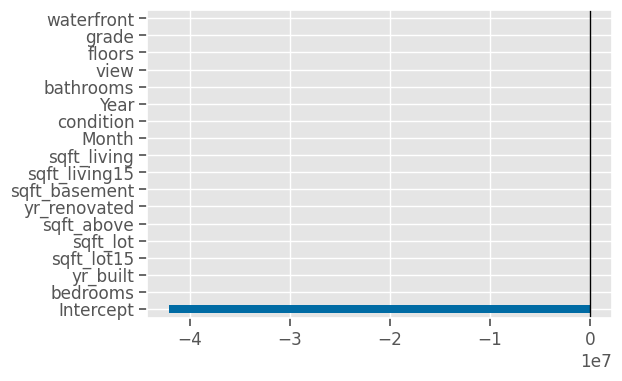

In [44]:
ax = plot_coeffs(reg)

### Tick Formatting

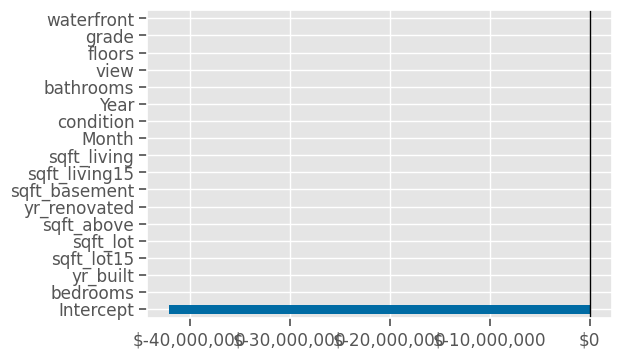

In [45]:
from matplotlib import ticker

ax = plot_coeffs(coeffs)

price_fmt = ticker.StrMethodFormatter("${x:,.0f}")
ax.xaxis.set_major_formatter(price_fmt)

In [46]:
## Make a "hundred_thousands" function 
def hundred_thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    return f"${x*1e-3:,.0f}k"

price_fmt_thous = ticker.FuncFormatter(hundred_thousands)

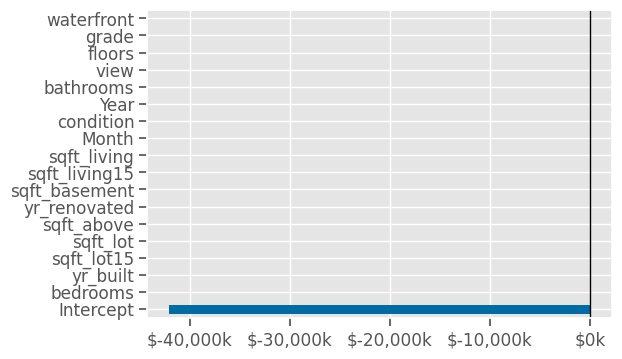

In [47]:
ax = plot_coeffs(coeffs)
ax.xaxis.set_major_formatter(price_fmt_thous)

## Effect of Scaling on Coefficients

In [48]:
## Make x and y variables
target = 'price'
drop_cols_model = ['zipcode','Month','lat','long','Year','view']

y = df_ml[target].copy()
X = df_ml.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)


## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(drop='first',
                                       sparse=False,
                                      ) )


## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')

num_pipe = make_pipeline( SimpleImputer(strategy='median'),  
                         StandardScaler()
                        )


## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)



## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,
2895600090,-0.3752,-1.4696,-1.0886,-0.1808,-0.9064,-0.0641,0.9097,-0.5437,-0.8154,-0.6603,-0.5794,-0.2066,-0.8388,-0.2291
8563000110,0.6943,-0.4542,-0.6813,-0.1208,-0.9064,-0.0641,0.9097,-0.5437,-0.3746,-0.6603,-0.1353,-0.2066,-0.2080,-0.0968
2591800340,-0.3752,0.2228,-0.2500,-0.1784,0.9494,-0.0641,0.9097,0.3590,0.0920,-0.6603,0.4111,-0.2066,-0.0849,-0.1840
7215721330,-0.3752,0.5613,-0.4537,-0.2574,0.9494,-0.0641,-0.6320,0.3590,-0.1283,-0.6603,0.9918,-0.2066,-0.4695,-0.2958
2424059061,0.6943,1.9152,1.7626,0.7140,0.9494,-0.0641,-0.6320,1.2616,1.4272,0.8742,1.4699,-0.2066,2.5921,1.0599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211200140,0.6943,-0.1157,-0.3698,-0.1835,-0.9064,-0.0641,-0.6320,-0.5437,-1.1524,1.3699,0.0013,-0.2066,-1.0849,-0.1959
6381502155,-0.3752,-1.4696,-0.6454,-0.1838,-0.9064,-0.0641,-0.6320,-0.5437,-0.3358,-0.6603,-0.5794,-0.2066,-1.0388,-0.1963
8964800695,-0.3752,-0.4542,0.2411,-0.0275,-0.9064,-0.0641,-0.6320,1.2616,0.6235,-0.6603,-0.7501,-0.2066,0.4228,-0.0192


In [49]:
reg = LinearRegression()
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2 = 0.62	RMSE = 159,111.30
Test Data:	R^2 = 0.63	RMSE = 157,516.62


<AxesSubplot: >

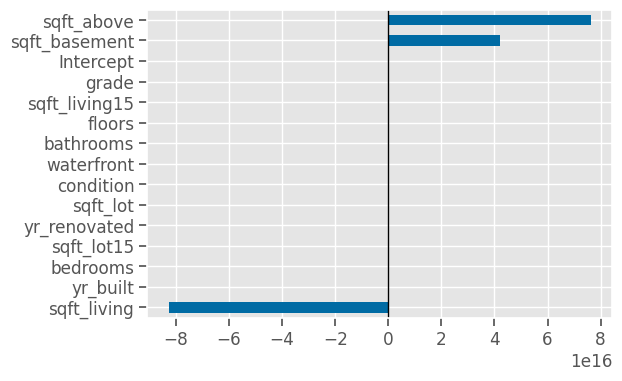

In [50]:
plot_coeffs(reg)

In [51]:
## Make x and y variables
target = 'price'
drop_cols_model = ['zipcode']#,'Month','lat','long','Year','view']

y = df_ml[target].copy()
X = df_ml.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)


## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(drop='first',
                                       sparse=False,
#                                        max_categories=5
                                      ) )


## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')

num_pipe = make_pipeline( SimpleImputer(strategy='median'),  
#                          StandardScaler()
                        )


## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)



## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,Month,Year
id,,,,,,,,,,,,,,,,,,,
2895600090,3.0000,1.0000,"1,120.0000","7,320.0000",1.0000,0.0000,0.0000,4.0000,7.0000,"1,120.0000",0.0000,"1,954.0000",0.0000,47.5103,-122.3820,"1,410.0000","6,328.0000",4.0000,"2,015.0000"
8563000110,4.0000,1.7500,"1,460.0000","9,750.0000",1.0000,0.0000,0.0000,4.0000,7.0000,"1,460.0000",0.0000,"1,967.0000",0.0000,47.6205,-122.1020,"1,820.0000","9,840.0000",4.0000,"2,015.0000"
2591800340,3.0000,2.2500,"1,820.0000","7,420.0000",2.0000,0.0000,0.0000,4.0000,8.0000,"1,820.0000",0.0000,"1,983.0000",0.0000,47.4368,-122.1620,"1,900.0000","7,526.0000",4.0000,"2,015.0000"
7215721330,3.0000,2.5000,"1,650.0000","4,218.0000",2.0000,0.0000,0.0000,3.0000,8.0000,"1,650.0000",0.0000,"2,000.0000",0.0000,47.5998,-122.0160,"1,650.0000","4,559.0000",10.0000,"2,014.0000"
2424059061,4.0000,3.5000,"3,500.0000","43,560.0000",2.0000,0.0000,0.0000,3.0000,9.0000,"2,850.0000",650.0000,"2,014.0000",0.0000,47.5481,-122.1030,"3,640.0000","40,545.0000",11.0000,"2,014.0000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211200140,4.0000,2.0000,"1,720.0000","7,210.0000",1.0000,0.0000,0.0000,3.0000,7.0000,860.0000,860.0000,"1,971.0000",0.0000,47.7307,-122.2390,"1,250.0000","7,210.0000",7.0000,"2,014.0000"
6381502155,3.0000,1.0000,"1,490.0000","7,200.0000",1.0000,0.0000,0.0000,3.0000,7.0000,"1,490.0000",0.0000,"1,954.0000",0.0000,47.7276,-122.3070,"1,280.0000","7,200.0000",1.0000,"2,015.0000"
8964800695,3.0000,1.7500,"2,230.0000","13,529.0000",1.0000,0.0000,0.0000,3.0000,9.0000,"2,230.0000",0.0000,"1,949.0000",0.0000,47.6204,-122.2170,"2,230.0000","11,900.0000",3.0000,"2,015.0000"


In [52]:
reg = LinearRegression(fit_intercept=False)
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

## Saving the coefficients
coeffs = pd.Series(reg.coef_, index= feature_names)
coeffs.loc['Intercept'] = reg.intercept_
# ax = coeffs.sort_values().plot(kind='barh')#,figsize=(6,4))
# ax.axvline(0,color='k', lw=1)
coeffs

Training Data:	R^2 = 0.71	RMSE = 139,932.23
Test Data:	R^2 = 0.71	RMSE = 140,401.68


bedrooms        -13,359.1111
bathrooms        27,377.8356
sqft_living          58.4383
sqft_lot              0.2300
floors           31,942.3686
waterfront      176,776.8585
view             41,943.0742
condition        29,198.2492
grade            87,993.0931
sqft_above           28.0575
sqft_basement        30.3808
yr_built         -2,040.1269
yr_renovated         21.2537
lat             545,071.0251
long            -38,150.2009
sqft_living15        54.0108
sqft_lot15           -0.2490
Month            -4,197.7721
Year            -13,479.3299
Intercept             0.0000
dtype: float64

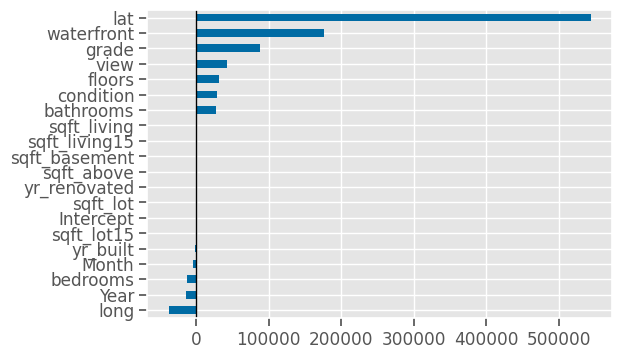

In [53]:
ax = coeffs.sort_values().plot(kind='barh',figsize=(6,4))
ax.axvline(0,color='k', lw=1)

# APPENDIX: FOR SLIDES

In [54]:
## Make x and y variables
target = 'price'
drop_cols_model = ['zipcode','Month','lat','long','Year','view']

y = df_ml[target].copy()
X = df_ml.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)


## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(drop='first',
                                       sparse=False,
#                                        max_categories=5
                                      ) )


## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')

num_pipe = make_pipeline( SimpleImputer(strategy='median'),  
#                          StandardScaler()
                        )


## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)



## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,
2895600090,3.0000,1.0000,"1,120.0000","7,320.0000",1.0000,0.0000,4.0000,7.0000,"1,120.0000",0.0000,"1,954.0000",0.0000,"1,410.0000","6,328.0000"
8563000110,4.0000,1.7500,"1,460.0000","9,750.0000",1.0000,0.0000,4.0000,7.0000,"1,460.0000",0.0000,"1,967.0000",0.0000,"1,820.0000","9,840.0000"
2591800340,3.0000,2.2500,"1,820.0000","7,420.0000",2.0000,0.0000,4.0000,8.0000,"1,820.0000",0.0000,"1,983.0000",0.0000,"1,900.0000","7,526.0000"
7215721330,3.0000,2.5000,"1,650.0000","4,218.0000",2.0000,0.0000,3.0000,8.0000,"1,650.0000",0.0000,"2,000.0000",0.0000,"1,650.0000","4,559.0000"
2424059061,4.0000,3.5000,"3,500.0000","43,560.0000",2.0000,0.0000,3.0000,9.0000,"2,850.0000",650.0000,"2,014.0000",0.0000,"3,640.0000","40,545.0000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211200140,4.0000,2.0000,"1,720.0000","7,210.0000",1.0000,0.0000,3.0000,7.0000,860.0000,860.0000,"1,971.0000",0.0000,"1,250.0000","7,210.0000"
6381502155,3.0000,1.0000,"1,490.0000","7,200.0000",1.0000,0.0000,3.0000,7.0000,"1,490.0000",0.0000,"1,954.0000",0.0000,"1,280.0000","7,200.0000"
8964800695,3.0000,1.7500,"2,230.0000","13,529.0000",1.0000,0.0000,3.0000,9.0000,"2,230.0000",0.0000,"1,949.0000",0.0000,"2,230.0000","11,900.0000"


In [55]:
X_train_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,
2895600090,3.0000,1.0000,"1,120.0000","7,320.0000",1.0000,0.0000,4.0000,7.0000,"1,120.0000",0.0000,"1,954.0000",0.0000,"1,410.0000","6,328.0000"
8563000110,4.0000,1.7500,"1,460.0000","9,750.0000",1.0000,0.0000,4.0000,7.0000,"1,460.0000",0.0000,"1,967.0000",0.0000,"1,820.0000","9,840.0000"
2591800340,3.0000,2.2500,"1,820.0000","7,420.0000",2.0000,0.0000,4.0000,8.0000,"1,820.0000",0.0000,"1,983.0000",0.0000,"1,900.0000","7,526.0000"
7215721330,3.0000,2.5000,"1,650.0000","4,218.0000",2.0000,0.0000,3.0000,8.0000,"1,650.0000",0.0000,"2,000.0000",0.0000,"1,650.0000","4,559.0000"
2424059061,4.0000,3.5000,"3,500.0000","43,560.0000",2.0000,0.0000,3.0000,9.0000,"2,850.0000",650.0000,"2,014.0000",0.0000,"3,640.0000","40,545.0000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211200140,4.0000,2.0000,"1,720.0000","7,210.0000",1.0000,0.0000,3.0000,7.0000,860.0000,860.0000,"1,971.0000",0.0000,"1,250.0000","7,210.0000"
6381502155,3.0000,1.0000,"1,490.0000","7,200.0000",1.0000,0.0000,3.0000,7.0000,"1,490.0000",0.0000,"1,954.0000",0.0000,"1,280.0000","7,200.0000"
8964800695,3.0000,1.7500,"2,230.0000","13,529.0000",1.0000,0.0000,3.0000,9.0000,"2,230.0000",0.0000,"1,949.0000",0.0000,"2,230.0000","11,900.0000"


In [56]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier,plot_tree

In [57]:
reg_tree = DecisionTreeRegressor(max_depth=4)
reg_tree.fit(X_train_df,y_train)
evaluate_regression(reg_tree, X_train_df, y_train, 
                    X_test_df, y_test)

Training Data:	R^2 = 0.58	RMSE = 167,907.35
Test Data:	R^2 = 0.59	RMSE = 167,498.41


In [58]:
reg_tree.get_depth()

4

In [59]:
plot_tree?

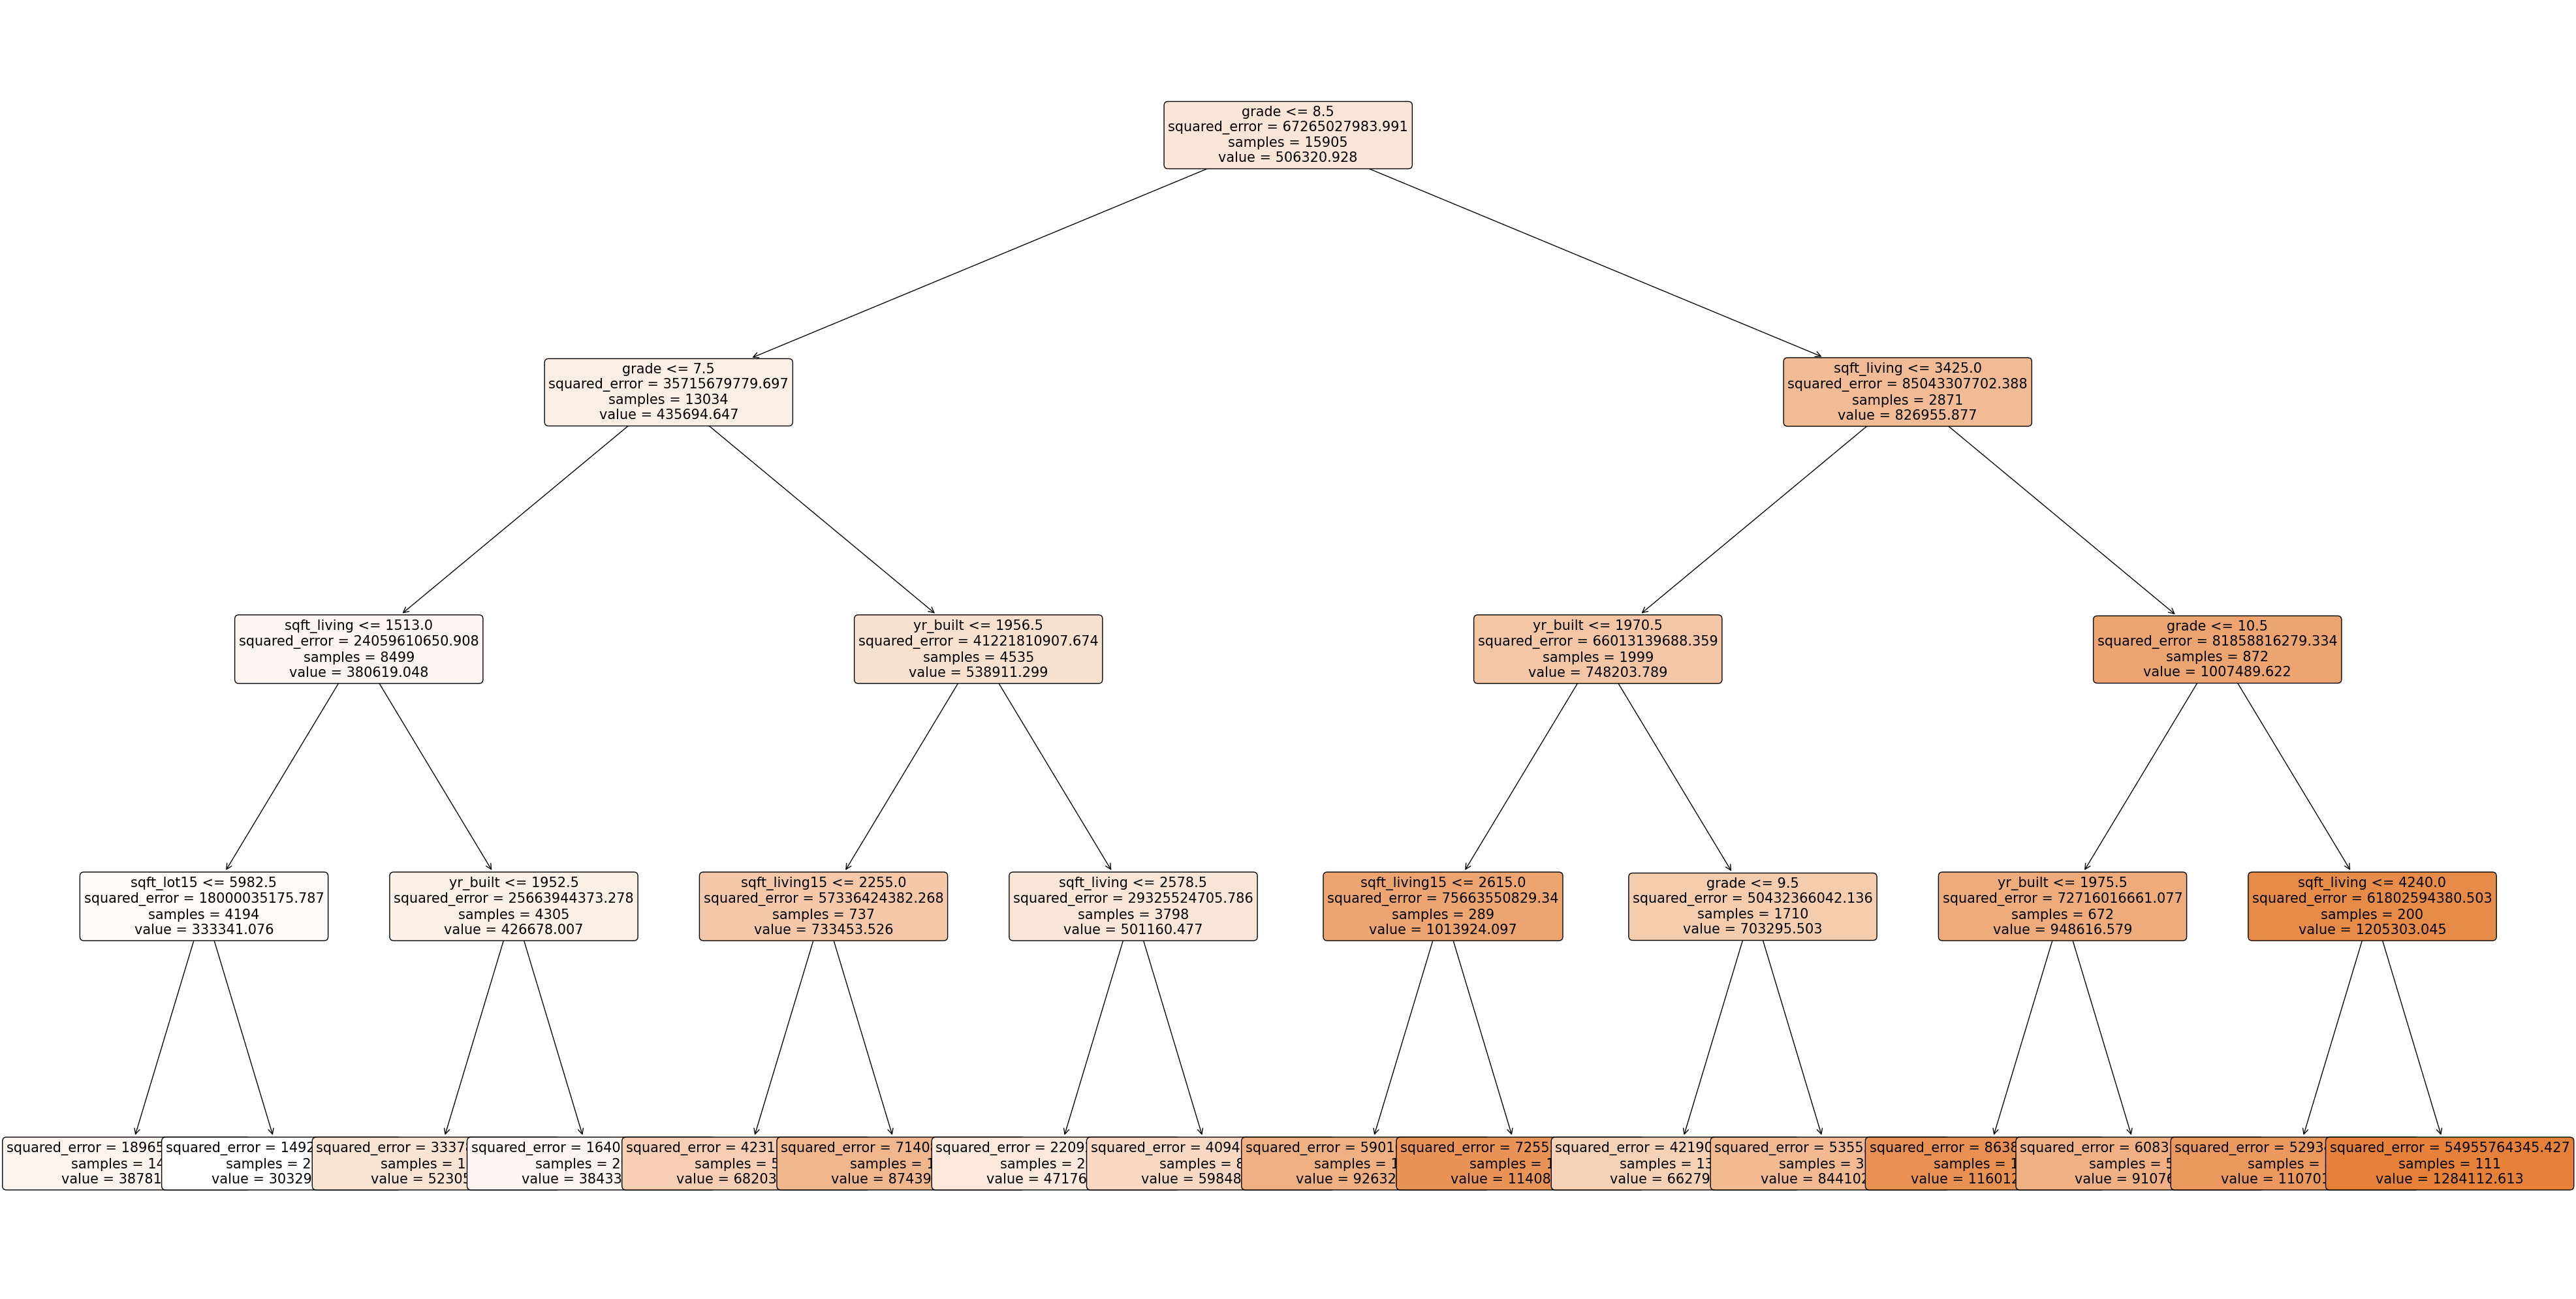

In [60]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(40,20))
    plot_tree(reg_tree,filled=True, rounded=True,feature_names=reg_tree.feature_names_in_,
             fontsize=15);
    plt.tight_layout()
    
    fig.savefig('Images/plot_tree_demo.png',dpi=300)

# MAIN NOTEBOOK CONTINUE'D

##  Pivot Classification

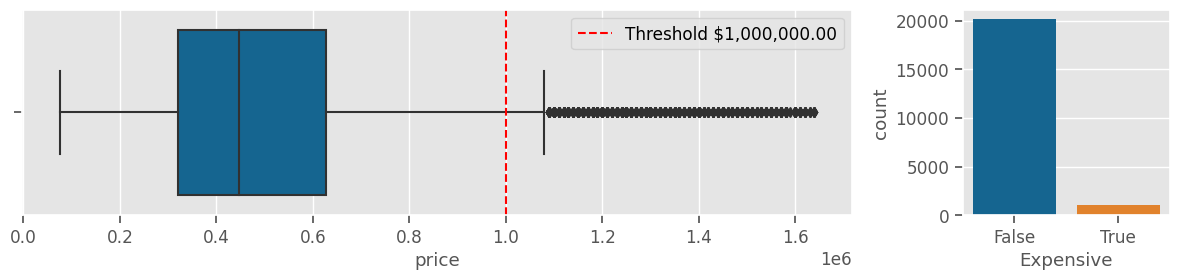

In [61]:
THRESH = 1e6
df_ml['Expensive'] = df_ml['price'] > THRESH

grid_spec = {'width_ratios':[0.8,0.2]}
fig, axes = plt.subplots(ncols=2, gridspec_kw=grid_spec, figsize=(12,3),)

ax=axes[0]
sns.boxplot(data=df_ml,x='price',ax=ax)
ax.axvline(THRESH,color='red',ls='--',label=f"Threshold ${THRESH:,.2f}")
ax.legend()
# ax.get_figure().set_size_inches(10,4)


ax = axes[1]
ax = sns.countplot(data=df_ml, x='Expensive',ax=ax)

fig.tight_layout()

In [62]:
def make_target_and_plot(df_ml, THRESH = 1e6):
    df_ml = df_ml.copy()
    df_ml['Expensive'] = df_ml['price'] > THRESH

    grid_spec = {'width_ratios':[0.8,0.2]}
    fig, axes = plt.subplots(ncols=2, gridspec_kw=grid_spec, figsize=(12,3),)

    ax=axes[0]
    sns.boxplot(data=df_ml,x='price',ax=ax)
    ax.axvline(THRESH,color='red',ls='--',label=f"Threshold ${THRESH:,.2f}")
    ax.legend()
    # ax.get_figure().set_size_inches(10,4)


    ax = axes[1]
    ax = sns.countplot(data=df_ml, x='Expensive',ax=ax)

    fig.tight_layout()
    
    return df_ml

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year,Expensive
id,,,,,,,,,,,,,,,,,,,,,,
7129300520,"221,900.0000",3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650,10,2014,False
6414100192,"538,000.0000",3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639,12,2014,True
5631500400,"180,000.0000",2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062,2,2015,False
2487200875,"604,000.0000",4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000,12,2014,True
1954400510,"510,000.0000",3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503,2,2015,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,"360,000.0000",3,2.5000,1530,1131,3.0000,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.3460,1530,1509,5,2014,False
6600060120,"400,000.0000",4,2.5000,2310,5813,2.0000,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.3620,1830,7200,2,2015,False
1523300141,"402,101.0000",2,0.7500,1020,1350,2.0000,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.2990,1020,2007,6,2014,False


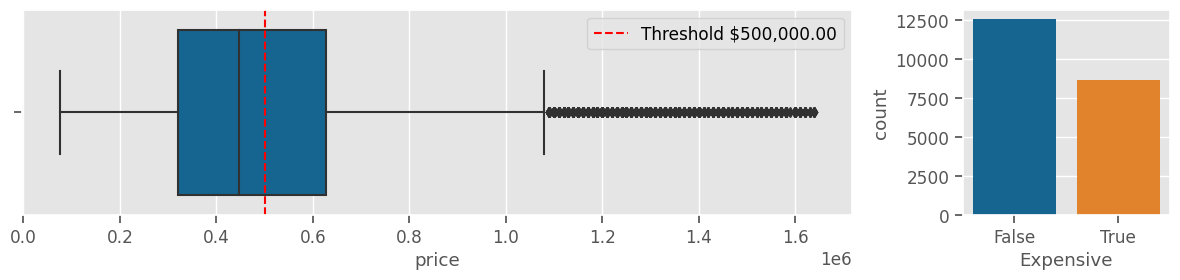

In [63]:
make_target_and_plot(df_ml, THRESH=500_000)

In [64]:
## Make x and y variables
target = 'Expensive'
drop_cols_model = ['zipcode','Month','lat','long','Year','view','price']

y = df_ml[target].copy()
X = df_ml.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)


## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(drop='first',
                                       sparse=False,
#                                        max_categories=5
                                      ) )


## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')

num_pipe = make_pipeline( SimpleImputer(strategy='median'),  
#                          StandardScaler()
                        )


## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)



## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,
2895600090,3.0000,1.0000,"1,120.0000","7,320.0000",1.0000,0.0000,4.0000,7.0000,"1,120.0000",0.0000,"1,954.0000",0.0000,"1,410.0000","6,328.0000"
8563000110,4.0000,1.7500,"1,460.0000","9,750.0000",1.0000,0.0000,4.0000,7.0000,"1,460.0000",0.0000,"1,967.0000",0.0000,"1,820.0000","9,840.0000"
2591800340,3.0000,2.2500,"1,820.0000","7,420.0000",2.0000,0.0000,4.0000,8.0000,"1,820.0000",0.0000,"1,983.0000",0.0000,"1,900.0000","7,526.0000"
7215721330,3.0000,2.5000,"1,650.0000","4,218.0000",2.0000,0.0000,3.0000,8.0000,"1,650.0000",0.0000,"2,000.0000",0.0000,"1,650.0000","4,559.0000"
2424059061,4.0000,3.5000,"3,500.0000","43,560.0000",2.0000,0.0000,3.0000,9.0000,"2,850.0000",650.0000,"2,014.0000",0.0000,"3,640.0000","40,545.0000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211200140,4.0000,2.0000,"1,720.0000","7,210.0000",1.0000,0.0000,3.0000,7.0000,860.0000,860.0000,"1,971.0000",0.0000,"1,250.0000","7,210.0000"
6381502155,3.0000,1.0000,"1,490.0000","7,200.0000",1.0000,0.0000,3.0000,7.0000,"1,490.0000",0.0000,"1,954.0000",0.0000,"1,280.0000","7,200.0000"
8964800695,3.0000,1.7500,"2,230.0000","13,529.0000",1.0000,0.0000,3.0000,9.0000,"2,230.0000",0.0000,"1,949.0000",0.0000,"2,230.0000","11,900.0000"


In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
clf = RandomForestClassifier()
clf.fit(X_train_df,y_train)

RandomForestClassifier()

--------------------------------------------------------------------------------
	CLASSIFICATION REPORT : (Admin)
--------------------------------------------------------------------------------
[i] Training Data:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     15121
        True       1.00      1.00      1.00       784

    accuracy                           1.00     15905
   macro avg       1.00      1.00      1.00     15905
weighted avg       1.00      1.00      1.00     15905



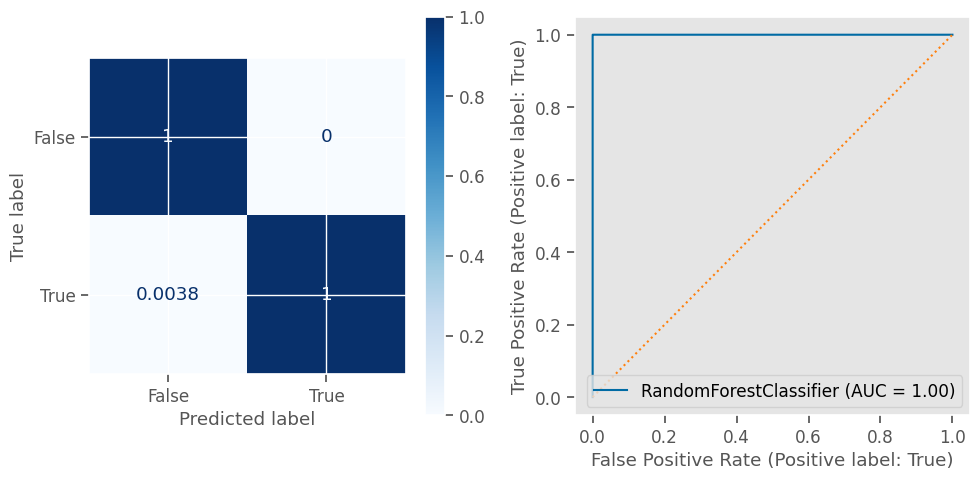

--------------------------------------------------------------------------------
[i] Test Data:
              precision    recall  f1-score   support

       False       0.97      0.99      0.98      5032
        True       0.74      0.46      0.56       270

    accuracy                           0.96      5302
   macro avg       0.86      0.72      0.77      5302
weighted avg       0.96      0.96      0.96      5302



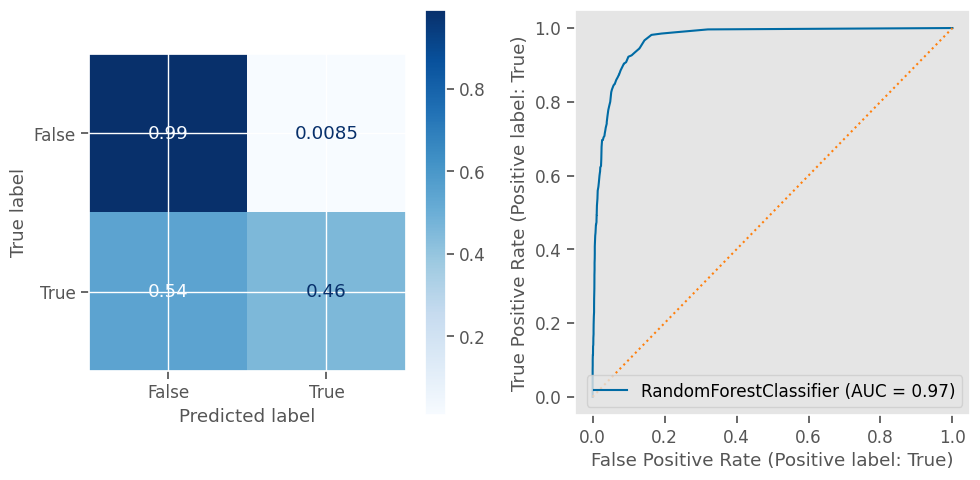

In [67]:
lp.evaluate_classification_admin(clf, X_train_df, y_train, X_test_df, y_test)


# ax.axvline(0,color='k', lw=1)
# importances

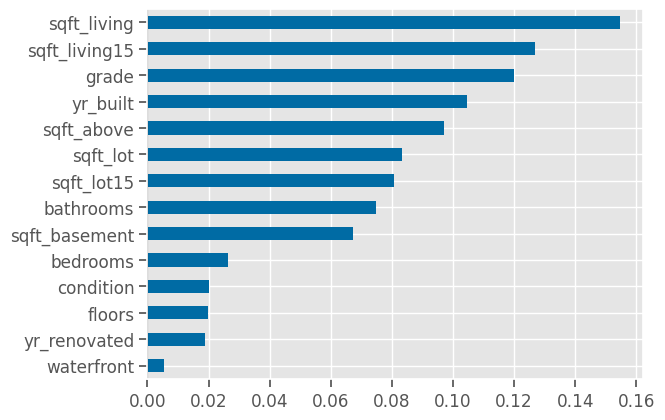

In [68]:
# Saving the coefficients
importances = pd.Series(clf.feature_importances_, index= clf.feature_names_in_)
# coeffs.loc['Intercept'] = reg.intercept_
ax = importances.sort_values().plot(kind='barh')#,figsize=(6,4))
ax.axvline(0, color='k')

## Model Explainers - SHAP

In [69]:
# Import shap and initialize javascript:
import shap
shap.initjs()

In [70]:
X_shap = shap.sample(X_train_df,nsamples = 500)
y_shap = y_train.loc[X_shap.index]

In [71]:
explainer = shap.Explainer(clf)
explainer

In [72]:
## Getting the shap values
shap_values = explainer(X_shap,y_shap)
type(shap_values)

shap._explanation.Explanation

In [73]:
X_shap.shape

(500, 14)

In [74]:
shap_values.shape

(500, 14, 2)

In [75]:
shap_values[0]

.values =
array([[ 0.00149503, -0.00149503],
       [ 0.00570373, -0.00570373],
       [ 0.02363412, -0.02363412],
       [-0.00147868,  0.00147868],
       [ 0.0010653 , -0.0010653 ],
       [ 0.00042847, -0.00042847],
       [ 0.00078013, -0.00078013],
       [ 0.0256776 , -0.0256776 ],
       [ 0.01722837, -0.01722837],
       [ 0.00233836, -0.00233836],
       [-0.04073089,  0.04073089],
       [ 0.00044044, -0.00044044],
       [ 0.018309  , -0.018309  ],
       [-0.00545874,  0.00545874]])

.base_values =
array([0.95056775, 0.04943225])

.data =
array([2.00e+00, 1.00e+00, 1.07e+03, 5.28e+03, 1.00e+00, 0.00e+00,
       3.00e+00, 6.00e+00, 1.07e+03, 0.00e+00, 1.90e+03, 0.00e+00,
       1.38e+03, 2.37e+03])

In [76]:
shap_vals_expensive = shap_values[:,:,1]
shap_vals_expensive.shape

(500, 14)

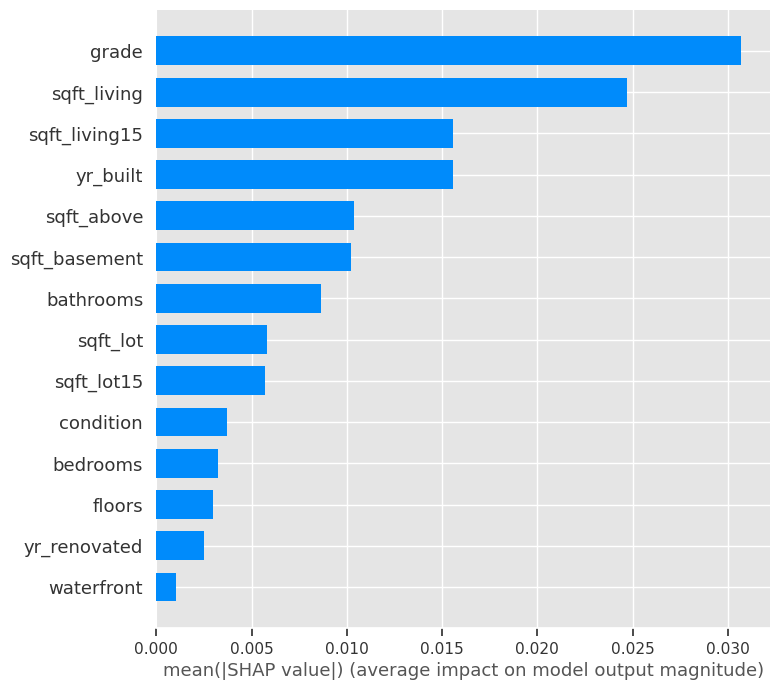

In [77]:
shap.summary_plot(shap_vals_expensive,features= X_shap, plot_type='bar')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


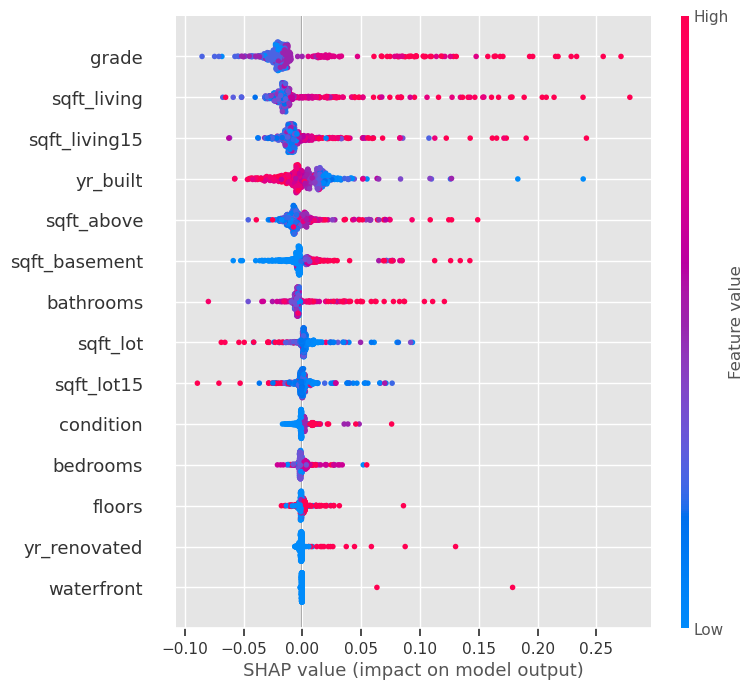

In [78]:
shap.summary_plot(shap_vals_expensive,X_shap)

In [79]:
# shap.dependence_plot("yr_built",shap_vals_expensive.values,features=X_shap)

## Part 2 - Time Series

In [80]:
df_ml['Year Built'] = pd.to_datetime(df['yr_built'],format="%Y")
ts = df_ml.set_index("Year Built")['price'].sort_index()
ts.plot();

reindexing with a non-unique Index is deprecated and will raise in a future version.


ValueError: cannot reindex on an axis with duplicate labels

In [ ]:
ts_count = ts.resample('Y').count()
ts_count

In [ ]:
ts_count.plot(title ='# of Homes',figsize=(12,3),kind='bar')#style='.-', 

In [ ]:
ts_mean = ts.resample('Y').mean()
ts_mean.plot(style='o-',figsize=(12,3), title='Average Home Value');

In [ ]:
ts_median = ts.resample('Y').median()
ts_median.plot(style='o-',figsize=(12,3), title='Median Home Value');

### TS - Price when sold

In [ ]:
df['Date'] = pd.to_datetime(df['date'])
df_ts = df.set_index("Date").sort_index()
df_ts

In [ ]:
ts = df_ts.resample('D')['price'].mean()
ts.plot()

### how does this compare to typical home values?

In [ ]:
fpath = 'Data/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv'
zillow = pd.read_csv(fpath)
zillow

In [ ]:
king_county = zillow[zillow['CountyName'] == 'King County']
king_county

In [ ]:
id_cols = king_county.columns[:9]
id_cols

In [ ]:
melted = pd.melt(king_county, id_vars=id_cols, 
                 value_name='Home Value', 
                      var_name="Month")
melted['Month'] = pd.to_datetime(melted['Month'])
melted = melted.set_index(['CountyName','Month'])
melted

In [ ]:
king_ts = melted.loc['King County'].resample('M').mean()["Home Value"]
king_ts

In [ ]:
df_ts

In [ ]:
plot_kws ={'style':'.-'}
ax = king_ts.loc[df_ts.index.min():df_ts.index.max()].plot(**plot_kws)

df_ts.resample('M').mean()['price'].plot(ax=ax, **plot_kws)
ax.legend()

In [ ]:
# king_ts = melted.groupby('CountyName', as_index=False).resample("M")['Home Value'].mean()#numeric_only=True)
# king_ts
# king_ts.plot();